In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

In [4]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [5]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [6]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

In [7]:
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


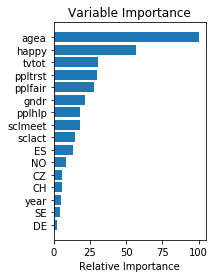

In [8]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [9]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [19]:
df.partner.value_counts()

1.0    5013
2.0    3134
Name: partner, dtype: int64

In [46]:
#Start by creating new features. Try the squares of the existing non-country features and create interactions, then PCA
#Then replicate the 2 values for df. partner such that we get a more even split on both (1*2, 2*3 should do it)
#more iterations? 500 to 600, 750, 1000
#try exponential
#greater depth to the trees

dfnums = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'agea', 'year', 'gndr'])]
np.square(dfnums)
np.power(dfnums, 2)
dfnums.columns = ['tvtot2', 'ppltrst2', 'pplfair2', 'pplhelp2', 'happy2', 'sclmeet2', 'sclact2']
df2 = pd.concat([df, dfnums])

In [47]:
dfnums.head()

,tvtot2,ppltrst2,pplfair2,pplhelp2,happy2,sclmeet2,sclact2
0,3.0,3.0,10.0,5.0,8.0,5.0,4.0
1,6.0,5.0,7.0,5.0,9.0,3.0,2.0
2,1.0,8.0,8.0,8.0,7.0,6.0,3.0
3,4.0,6.0,6.0,7.0,10.0,6.0,2.0
4,5.0,6.0,7.0,5.0,8.0,7.0,2.0


In [48]:
y = df2['partner'] - 1
X = df2.loc[:, ~df2.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df2['cntry'])], axis=1)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [49]:
df2.isnull().sum().sort_values(ascending=False).head()

year      8147
tvtot2    8147
cntry     8147
gndr      8147
happy     8147
dtype: int64

In [45]:
df2.head()

,agea,cntry,gndr,happy,happy2,idno,partner,pplfair,pplfair2,pplhelp2,pplhlp,ppltrst,ppltrst2,sclact,sclact2,sclmeet,sclmeet2,tvtot,tvtot2,year
0,60.0,CH,2.0,8.0,NaN,5.0,1.0,10.0,NaN,NaN,5.0,3.0,NaN,4.0,NaN,5.0,NaN,3.0,NaN,6.0
1,59.0,CH,2.0,9.0,NaN,25.0,1.0,7.0,NaN,NaN,5.0,5.0,NaN,2.0,NaN,3.0,NaN,6.0,NaN,6.0
2,24.0,CH,1.0,7.0,NaN,26.0,2.0,8.0,NaN,NaN,8.0,8.0,NaN,3.0,NaN,6.0,NaN,1.0,NaN,6.0
3,64.0,CH,2.0,10.0,NaN,28.0,1.0,6.0,NaN,NaN,7.0,6.0,NaN,2.0,NaN,6.0,NaN,4.0,NaN,6.0
4,55.0,CH,2.0,8.0,NaN,29.0,1.0,7.0,NaN,NaN,5.0,6.0,NaN,2.0,NaN,7.0,NaN,5.0,NaN,6.0


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16294 entries, 0 to 8593
Data columns (total 20 columns):
agea        8147 non-null float64
cntry       8147 non-null object
gndr        8147 non-null float64
happy       8147 non-null float64
happy2      8147 non-null float64
idno        8147 non-null float64
partner     8147 non-null float64
pplfair     8147 non-null float64
pplfair2    8147 non-null float64
pplhelp2    8147 non-null float64
pplhlp      8147 non-null float64
ppltrst     8147 non-null float64
ppltrst2    8147 non-null float64
sclact      8147 non-null float64
sclact2     8147 non-null float64
sclmeet     8147 non-null float64
sclmeet2    8147 non-null float64
tvtot       8147 non-null float64
tvtot2      8147 non-null float64
year        8147 non-null float64
dtypes: float64(19), object(1)
memory usage: 2.6+ MB


In [32]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').